In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smart-grid-stability/smart_grid_stability_augmented.csv


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
!pip install catboost 
from catboost import CatBoostClassifier
import seaborn as sn
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [62]:
df = pd.read_csv('/kaggle/input/smart-grid-stability/smart_grid_stability_augmented.csv')

In [63]:
x = df.values[:, :-2]
y = df.values[: , -1]

In [64]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [66]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [67]:
models = []
models_name = []

In [68]:
# logistic regression

lg = LogisticRegression()
lg.fit(x_train , y_train)
models.append(lg)
models_name.append('Logistic Regression')
lg.score(x_test , y_test)

0.8101666666666667

In [69]:
# Support vector Machine
svm = SVC()
svm.fit(x_train , y_train)
models.append(svm)
models_name.append('Support Vector Machine')
svm.score(x_test , y_test)

0.9773333333333334

In [70]:
# Naive Bayes
nb = GaussianNB( )
nb.fit(x_train , y_train)
models.append(nb)
models_name.append('Naive Bayes')
nb.score(x_test , y_test)


0.8299166666666666

In [71]:
# mistake in paper
dt = DecisionTreeClassifier(criterion='gini', max_depth= None, min_samples_split = 2,
min_samples_leaf = 1, class_weight=None, random_state = None, min_impurity_decrease = 0.0 )
dt.fit(x_train , y_train)
dt.score(x_test , y_test)

0.8973333333333333

In [72]:
# Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=60)
dt.fit(x_train , y_train)
models.append(dt)
models_name.append('Decision Tree Classifier')
dt.score(x_test , y_test)

0.90575

In [73]:
# Random Forest
rf = RandomForestClassifier( n_estimators=60 , criterion='entropy' , max_depth =100)
rf.fit(x_train , y_train)
models.append(rf)
models_name.append('Random Forest Classifier')
rf.score(x_test , y_test)

0.94725

In [74]:
# xgboost 
xg = XGBClassifier(n_estimators=1500 , max_depth = 9 , random_state = 42 , learning_rate = 0.5)
xg.fit(x_train , y_train)
models.append(xg)
models_name.append('XGBosst Classifier')
xg.score(x_test , y_test)

0.99075

In [75]:
# cat boost 
cb = CatBoostClassifier( iterations = 1500, verbose = 0 , learning_rate = 0.5)
cb.fit(x_train , y_train)
models.append(cb)
models_name.append('Catboost Classifier')
cb.score(x_test , y_test)

0.9939166666666667

In [76]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors = 5 )
knn.fit(x_train , y_train)
models.append(knn)
models_name.append('KNN')
knn.score(x_test , y_test)

0.8871666666666667

In [77]:
# ADA BOOST 
ada = AdaBoostClassifier( base_estimator=cb)
ada.fit(x_train , y_train)
models.append(ada)
models_name.append('AdaBoost')
ada.score(x_test , y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9924166666666666

In [87]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

In [88]:
classifier_layered = StackingClassifier(
     estimators=[    ('svc', SVC()),
                     ('knn', KNeighborsClassifier()),
                     ('xg', XGBClassifier()),
                     ('dt', DecisionTreeClassifier())
                 ],
     final_estimator= RandomForestClassifier(), passthrough=True, n_jobs=-1)

multi_classifier_layered = StackingClassifier(
     estimators=[    ('cat', CatBoostClassifier(verbose = False)),
                     ('ada', AdaBoostClassifier()),
                     ('rd', RandomForestClassifier()),
                     
                 ],
     final_estimator= classifier_layered, passthrough=True, n_jobs=-1)

In [89]:
multi_classifier_layered.fit(x_train, y_train).score(x_test, y_test)
models.append(multi_classifier_layered)
models_name.append("Stacking (Starnet Model)")
multi_classifier_layered.score(x_test , y_test)

In [90]:
print(models_name)

['Logistic Regression', 'Support Vector Machine', 'Naive Bayes', 'Decision Tree Classifier', 'Random Forest Classifier', 'XGBosst Classifier', 'Catboost Classifier', 'KNN', 'AdaBoost', 'Stacking (Starnet Model)']


In [91]:
print(models)

[LogisticRegression(), SVC(), GaussianNB(), DecisionTreeClassifier(criterion='entropy', max_depth=60), RandomForestClassifier(criterion='entropy', max_depth=100, n_estimators=60), XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...), <catboost.core.CatBoostClassifier object at 0x7e33dd6a2cb0>, KNeighborsC

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [93]:
# Calculate evaluation metrics for each model
metrics = []
preci = 4
for model , model_name in zip ( models , models_name):
    y_true = y_test
    y_pred = model.predict(x_test)
    accuracy = round(accuracy_score(y_true, y_pred) , preci)
    precision = round ( precision_score(y_true, y_pred) , preci)
    recall = round (recall_score(y_true, y_pred) , preci)
    f1 = round (f1_score(y_true, y_pred) ,preci)
    auc_roc = round (roc_auc_score(y_true, y_pred) , preci)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = round ((tn / (tn + fp)) , preci)
    
    metrics.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc_roc,
        'Specificity': specificity
    })

# Create a dataframe to store the metrics
metrics_df = pd.DataFrame(metrics)

In [94]:
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC,Specificity
0,Logistic Regression,0.8102,0.8360,0.8750,0.8550,0.7850,0.6950
1,Support Vector Machine,0.9773,0.9797,0.9850,0.9823,0.9743,0.9637
2,Naive Bayes,0.8299,0.8302,0.9229,0.8741,0.7938,0.6647
3,Decision Tree Classifier,0.9058,0.9227,0.9307,0.9267,0.8961,0.8614
4,Random Forest Classifier,0.9472,0.9529,0.9652,0.9590,0.9403,0.9153
5,XGBosst Classifier,0.9908,0.9916,0.9940,0.9928,0.9895,0.9850
6,Catboost Classifier,0.9939,0.9942,0.9964,0.9953,0.9930,0.9896
7,KNN,0.8872,0.8891,0.9410,0.9143,0.8663,0.7915
8,AdaBoost,0.9924,0.9932,0.9949,0.9941,0.9914,0.9880
9,Stacking (Starnet Model),0.9943,0.9951,0.9961,0.9956,0.9937,0.9912


[array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 1]), array([1, 1, 1, ..., 0, 0, 1]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0])]


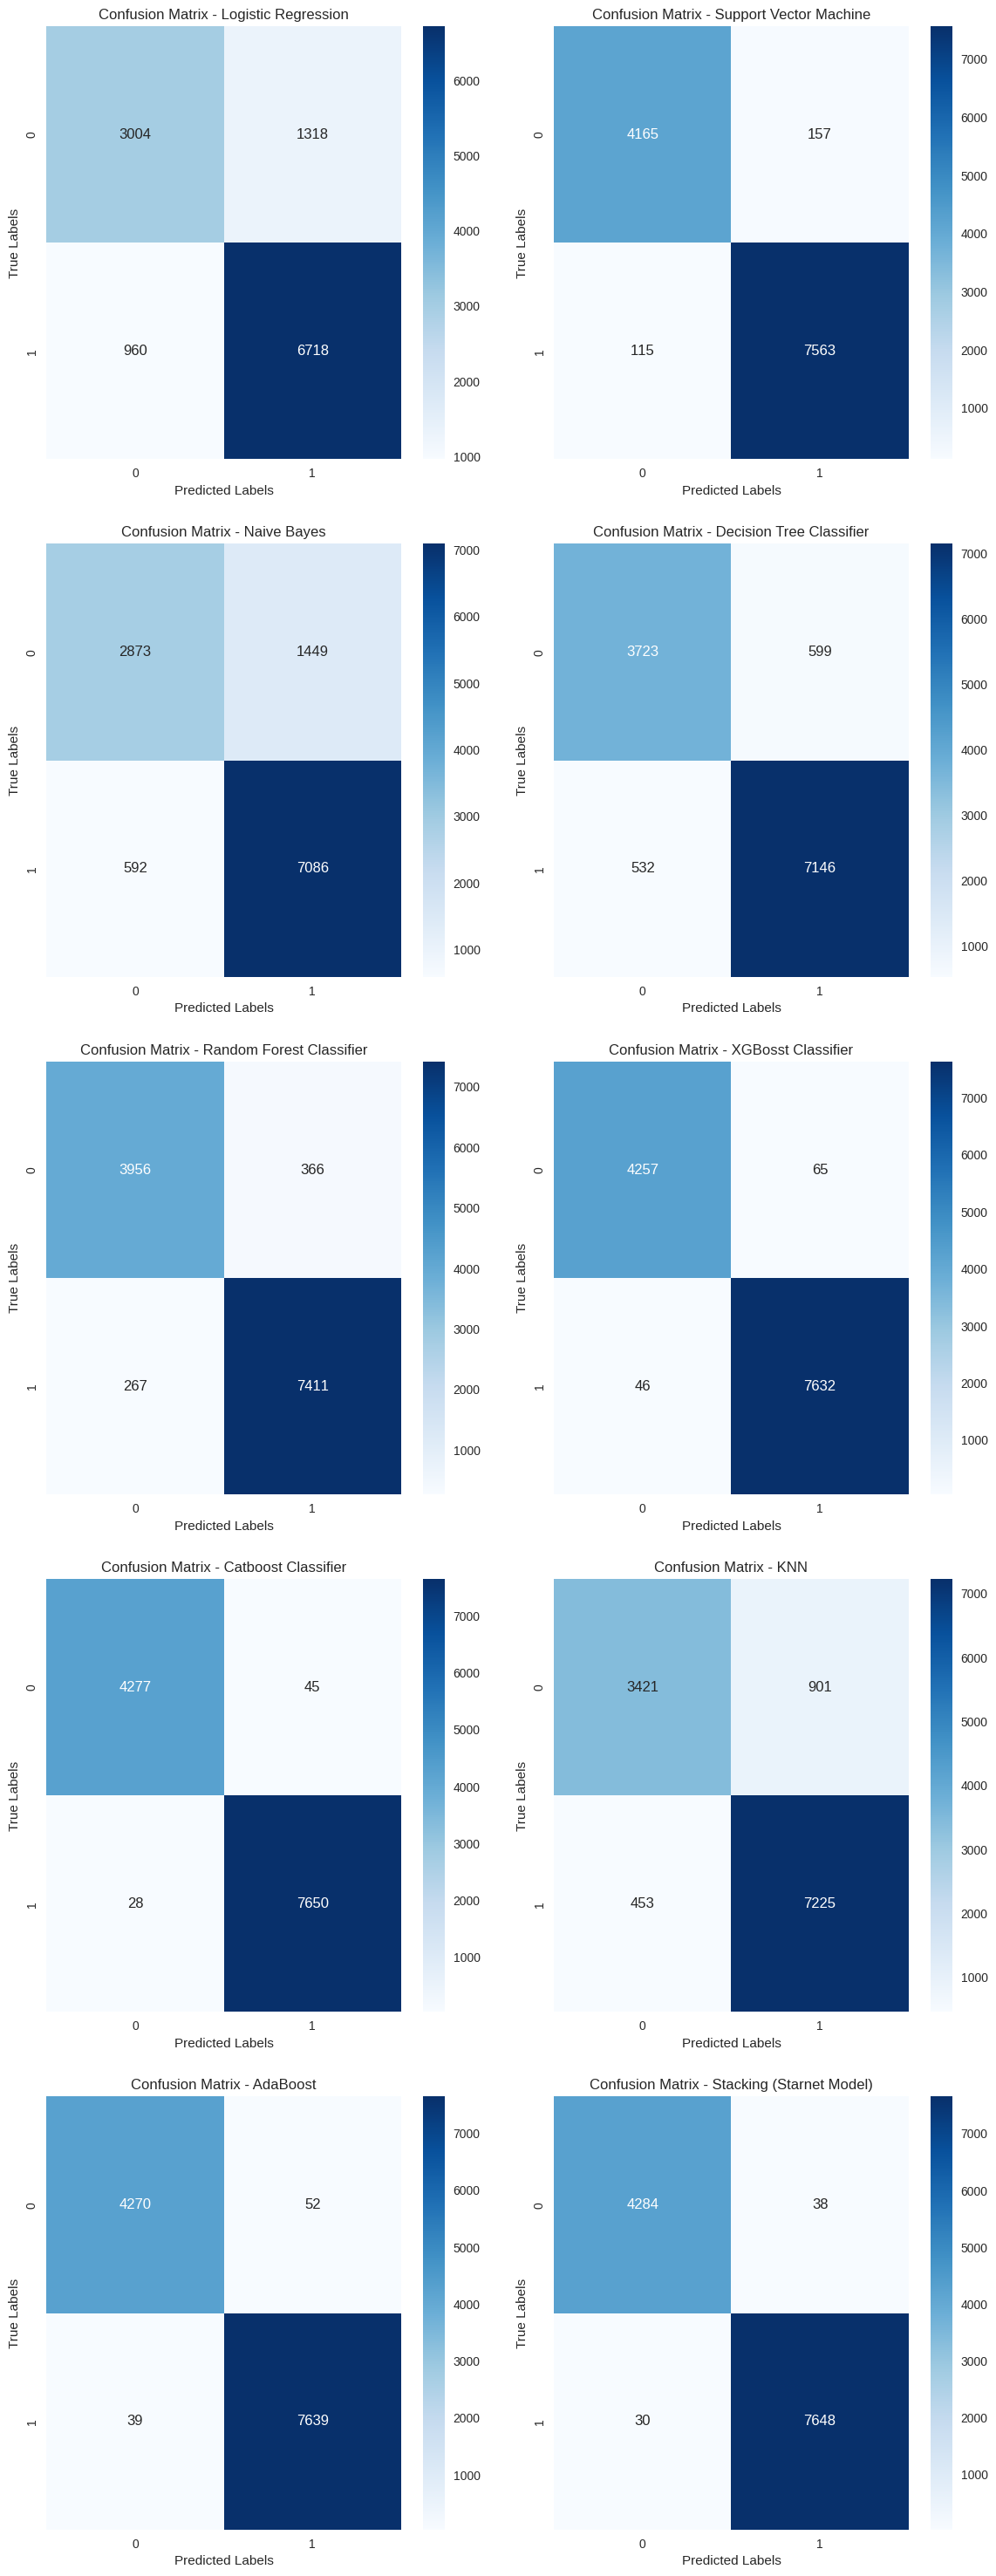

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix


y_true = y_test

# Example list of model names and their predicted labels
model_predictions = []
for model in models:
    model_predictions.append(model.predict(x_test))

print(model_predictions)
# Calculate the number of rows and columns for subplots
num_models = len(models_name)
num_rows = int(np.ceil(num_models / 2))
num_cols = 2

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array if necessary
if num_models == 1:
    axes = np.array([axes])

    
# Iterate over each model
for i, (model_name, predictions) in enumerate(zip(models_name, model_predictions)):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, predictions)
    precision = precision_score(y_true, predictions)
    recall = recall_score(y_true, predictions)
    f1 = f1_score(y_true, predictions)
    auc_roc = roc_auc_score(y_true, predictions)

    # Plot confusion matrix
    ax_cm = axes[i // num_cols, i % num_cols]
    cm = confusion_matrix(y_true, predictions)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=ax_cm)
    ax_cm.set_title(f"Confusion Matrix - {model_name}")
    ax_cm.set_xlabel("Predicted Labels")
    ax_cm.set_ylabel("True Labels")
    
# Remove empty subplots if necessary
if num_models % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

# Adjust spacing between subplots
plt.tight_layout(pad=2.0)

# Save the figure
plt.savefig("confusion_matrix.png")
plt.show()


[array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 1]), array([1, 1, 1, ..., 0, 0, 1]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0]), array([1, 1, 1, ..., 0, 0, 0])]


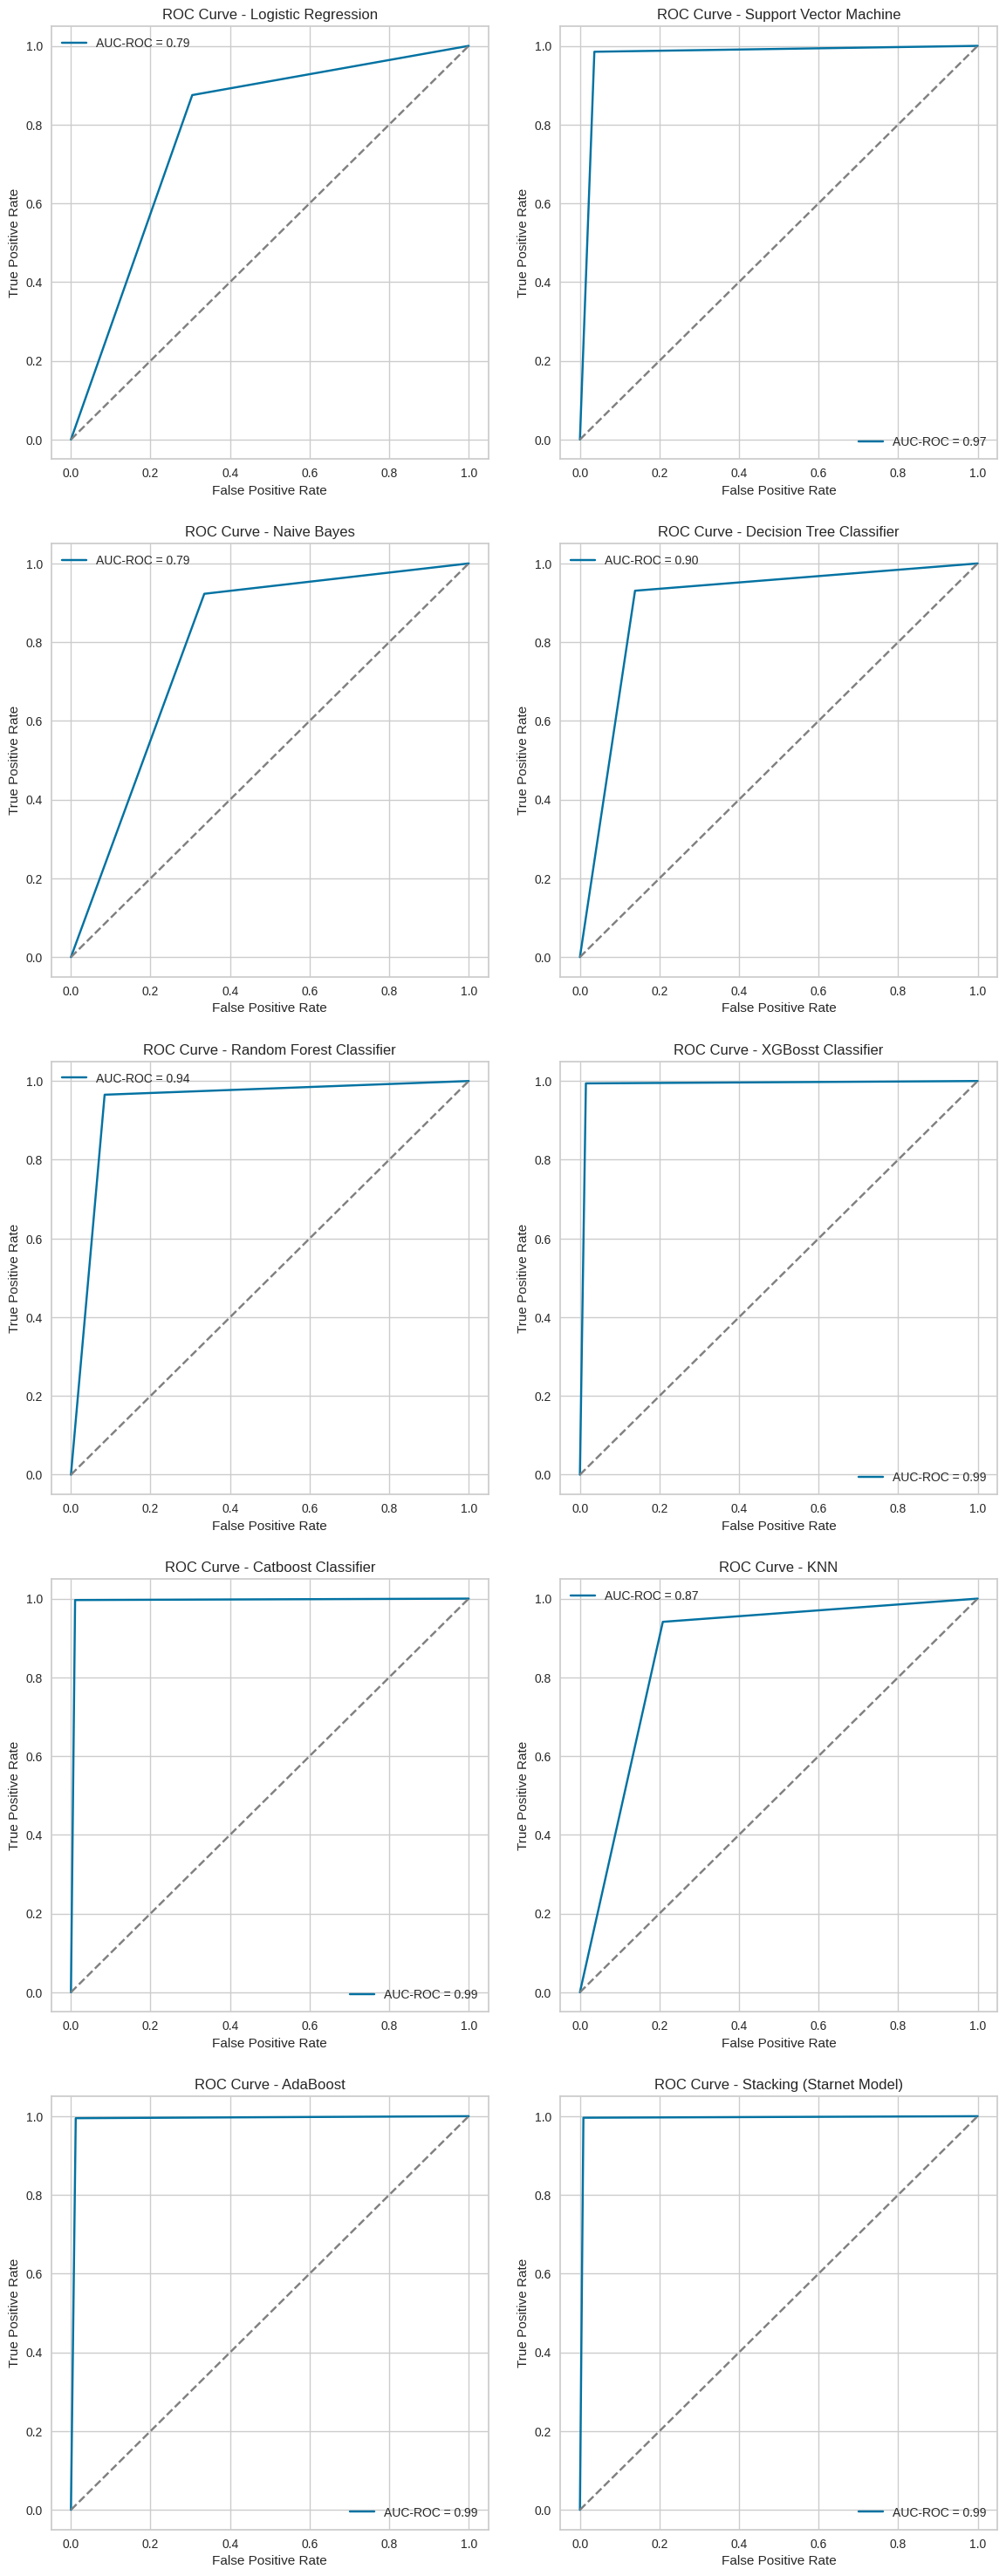

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix


y_true = y_test

# Example list of model names and their predicted labels
model_predictions = []
for model in models:
    model_predictions.append(model.predict(x_test))

print(model_predictions)
# Calculate the number of rows and columns for subplots
num_models = len(models_name)
num_rows = int(np.ceil(num_models / 2))
num_cols = 2

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array if necessary
if num_models == 1:
    axes = np.array([axes])

    
# Iterate over each model
for i, (model_name, predictions) in enumerate(zip(models_name, model_predictions)):
    # Calculate evaluation metrics
    
    auc_roc = roc_auc_score(y_true, predictions)
    ax_roc = axes[i // num_cols, i % num_cols]
    fpr, tpr, _ = roc_curve(y_true, predictions)
    ax_roc.plot(fpr, tpr, label=f"AUC-ROC = {auc_roc:.2f}")
    ax_roc.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax_roc.set_title(f"ROC Curve - {model_name}")
    ax_roc.set_xlabel("False Positive Rate")
    ax_roc.set_ylabel("True Positive Rate")
    ax_roc.legend()

# Remove empty subplots if necessary
if num_models % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

# Adjust spacing between subplots
plt.tight_layout(pad=2.0)

# Save the figure
plt.savefig("roc.png")
plt.show()


In [98]:
metrics_df.to_csv('results.csv')